 #  Portfolio Analysis

In [68]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import os
from datetime import datetime, timedelta


# Data Cleaning
## Files:
1. atnt_stock.csv
2. FINX stock.csv
3. JPM.csv
4. MSFT.csv
5. PFE stock.csv
6. xom_stock .csv
7. inx.csv

## Porfolio Returns

In [69]:
# Reading AT&T returns
atnt_hist_csv = Path("Data/atnt_stock.csv")
atnt_data = pd.read_csv(atnt_hist_csv, parse_dates=True, infer_datetime_format=True)
atnt_data['Date'] = pd.to_datetime(atnt_data['Date']).dt.date
atnt_data = atnt_data.set_index('Date').sort_index(ascending = True)
atnt_data.head()

,Symbol,Close
Date,,
2019-01-02,T,29.54
2019-01-03,T,29.58
2019-01-04,T,30.34
2019-01-07,T,30.89
2019-01-08,T,31.28


In [70]:
# Reading JPM returns
jpm_hist_csv = Path("Data/JPM.csv")
jpm_data = pd.read_csv(jpm_hist_csv, parse_dates=True, infer_datetime_format=True)
jpm_data['Date'] = pd.to_datetime(jpm_data['Date']).dt.date
jpm_data = jpm_data.set_index('Date').sort_index(ascending = True)
jpm_data.head()

,Symbol,Close
Date,,
2019-01-02,JPM,99.31
2019-01-03,JPM,97.11
2019-01-04,JPM,100.69
2019-01-07,JPM,100.76
2019-01-08,JPM,100.57


In [71]:
# Reading MSFT returns
msft_hist_csv = Path("Data/MSFT.csv")
msft_data = pd.read_csv(msft_hist_csv, parse_dates=True, infer_datetime_format=True)
msft_data['Date'] = pd.to_datetime(msft_data['Date']).dt.date
msft_data = msft_data.set_index('Date').sort_index(ascending = True)
msft_data.head()

,Symbol,Close
Date,,
2019-01-02,MSFT,101.12
2019-01-03,MSFT,97.40
2019-01-04,MSFT,101.93
2019-01-07,MSFT,102.06
2019-01-08,MSFT,102.80


In [72]:
# Reading XOM returns
xom_hist_csv = Path("Data/xom_stock.csv")
xom_data = pd.read_csv(xom_hist_csv, parse_dates=True, infer_datetime_format=True)
xom_data['Date'] = pd.to_datetime(xom_data['Date']).dt.date
xom_data = xom_data.set_index('Date').sort_index(ascending = True)
xom_data.head()

,Symbol,Close
Date,,
2019-01-02,XOM,69.69
2019-01-03,XOM,68.62
2019-01-04,XOM,71.15
2019-01-07,XOM,71.52
2019-01-08,XOM,72.04


In [73]:
# Reading PFE returns
pfe_hist_csv = Path("Data/PFE_stock.csv")
pfe_data = pd.read_csv(pfe_hist_csv, parse_dates=True, infer_datetime_format=True)
pfe_data['Date'] = pd.to_datetime(pfe_data['Date']).dt.date
pfe_data = pfe_data.set_index('Date').sort_index(ascending = True)
pfe_data.head()

,Symbol,Close
Date,,
2019-01-02,PFE,43.25
2019-01-03,PFE,42.04
2019-01-04,PFE,43.00
2019-01-07,PFE,43.23
2019-01-08,PFE,43.43


In [74]:
# Custom Portfolio
custom_portfolio = pd.concat([atnt_data,jpm_data,msft_data,xom_data,pfe_data], axis="rows", join="inner")
custom_portfolio = custom_portfolio.reset_index()
custom_portfolio.head()

,Date,Symbol,Close
0,2019-01-02,T,29.54
1,2019-01-03,T,29.58
2,2019-01-04,T,30.34
3,2019-01-07,T,30.89
4,2019-01-08,T,31.28


In [75]:
#Custom Portfolio
custom_portfolio = custom_portfolio.pivot_table(values="Close", index="Date", columns="Symbol")
custom_portfolio.head()

Symbol,JPM,MSFT,PFE,T,XOM
Date,,,,,
2019-01-02,99.31,101.12,43.25,29.54,69.69
2019-01-03,97.11,97.40,42.04,29.58,68.62
2019-01-04,100.69,101.93,43.00,30.34,71.15
2019-01-07,100.76,102.06,43.23,30.89,71.52
2019-01-08,100.57,102.80,43.43,31.28,72.04


In [76]:
# Drop Nulls
custom_portfolio = custom_portfolio.dropna().copy()
custom_portfolio.isna().sum()

Symbol
JPM     0
MSFT    0
PFE     0
T       0
XOM     0
dtype: int64

In [77]:
# Calculate weighted portfolio returns
weights = [2/10, 5/10, 1/10, 1/10, 2/10]
# YOUR CODE HERE
custom_portfolio_returns = custom_portfolio.pct_change()
custom_weighted_port_returns = custom_portfolio_returns.dot(weights)
custom_weighted_port_returns.head()

Date
2019-01-02         NaN
2019-01-03   -0.028558
2019-01-04    0.042854
2019-01-07    0.004164
2019-01-08    0.006428
dtype: float64

In [78]:
# Reading FINX ETF data
finx_hist_csv = Path("Data/FINX_stock.csv")
finx_data = pd.read_csv(finx_hist_csv, parse_dates=True, infer_datetime_format=True)
finx_data['Date'] = pd.to_datetime(finx_data['Date']).dt.date
finx_data = finx_data.set_index('Date').sort_index(ascending = True)
finx_data = finx_data.pivot_table(values="Close", index="Date", columns="Symbol")
finx_data.head()

Symbol,FINX
Date,
2019-01-02,22.14
2019-01-03,21.30
2019-01-04,22.32
2019-01-07,22.65
2019-01-08,23.06


In [79]:
# FINX ETF daily returns

finx_data_returns = finx_data.pct_change()
finx_data_returns.head()

Symbol,FINX
Date,
2019-01-02,NaN
2019-01-03,-0.037940
2019-01-04,0.047887
2019-01-07,0.014785
2019-01-08,0.018102


In [80]:
# Drop nulls
finx_data = finx_data.dropna().copy()
finx_data.isna().sum()

Symbol
FINX    0
dtype: int64

In [81]:
# Reading S&P 500 data
SP500_hist_csv = Path("Data/inx.csv")
SP500_data = pd.read_csv(SP500_hist_csv, parse_dates=True, infer_datetime_format=True)
SP500_data['Date'] = pd.to_datetime(SP500_data['Date']).dt.date
SP500_data = SP500_data.set_index('Date').sort_index(ascending = True)
SP500_data = SP500_data.pivot_table(values="Close", index="Date", columns="Symbol")
SP500_data.head()

Symbol,S&P 500
Date,
2019-01-02,2510.03
2019-01-03,2447.89
2019-01-04,2531.94
2019-01-07,2549.69
2019-01-08,2574.41


In [82]:
SP500_data_returns = SP500_data.pct_change()
SP500_data_returns.head()

Symbol,S&P 500
Date,
2019-01-02,NaN
2019-01-03,-0.024757
2019-01-04,0.034336
2019-01-07,0.007010
2019-01-08,0.009695


In [83]:
# Drop nulls
SP500_data = SP500_data.dropna().copy()
SP500_data.isna().sum()

Symbol
S&P 500    0
dtype: int64

## Combine Custom Portfolio, FINX ETF, and S&P 500 Returns

In [84]:
# Concatenate all DataFrames into a single DataFrame

combined_daily_returns = pd.concat([finx_data_returns,SP500_data_returns], axis="columns", join="inner")
combined_daily_returns["Custom Portfolio"]= custom_weighted_port_returns
combined_daily_returns.head()

Symbol,FINX,S&P 500,Custom Portfolio
Date,,,
2019-01-02,NaN,NaN,NaN
2019-01-03,-0.037940,-0.024757,-0.028558
2019-01-04,0.047887,0.034336,0.042854
2019-01-07,0.014785,0.007010,0.004164
2019-01-08,0.018102,0.009695,0.006428


---

# Monte Carlo Simulation



In [95]:
# Mean of daily returns
avg_daily_return_finx = combined_daily_returns.mean()["FINX"]
avg_daily_return_snp500 = combined_daily_returns.mean()["S&P 500"]
avg_daily_return_custom_porfolio = combined_daily_returns.mean()["Custom Portfolio"]
avg_daily_return_custom_porfolio

0.0008103990293424906

In [96]:
# Compute daily volatility
std_daily_return_finx = combined_daily_returns.std()["FINX"]
std_daily_return_snp500 = combined_daily_returns.std()["S&P 500"]
std_daily_return_custom_porfolio = combined_daily_returns.std()["Custom Portfolio"]
std_daily_return_custom_porfolio

0.021840070850772525

In [97]:
# Save the last day's closing price
finx_last_price = finx_data["FINX"][-1]
snp500_last_price = SP500_data["S&P 500"][-1]
custom_potfolio_last_price = combined_daily_returns["Custom Portfolio"][-1]

In [103]:
# Setup the Monte Carlo Parameters
number_records = 252 * 10

In [101]:
# Initialize the simulated prices list with the last closing price of FINX
simulated_finx_prices = [finx_last_price]

# Simulate the returns for 252 days * 10
for i in range(number_records):
    # Calculate the simulated price using the last price within the list
    simulated_price = simulated_finx_prices[-1] * (1 + np.random.normal(avg_daily_return_finx, std_daily_return_finx))
#     print(simulated_finx_prices)
    # Append the simulated price to the list
    simulated_finx_prices.append(simulated_price)
    
# Create a DataFrame of the simulated prices
simulated_price_df = pd.DataFrame({
    "Simulated FINX Prices": simulated_finx_prices
})

# Print head of DataFrame
simulated_price_df.head()

,Simulated FINX Prices
0,32.620000
1,32.380441
2,32.410620
3,33.262396
4,33.960492


In [102]:
# Initialize the simulated prices list with the last closing price of S&P 500
simulated_snp500_prices = [snp500_last_price]

# Simulate the returns for 252 days * 10
for i in range(number_records):
    # Calculate the simulated price using the last price within the list
    simulated_price = simulated_snp500_prices[-1] * (1 + np.random.normal(avg_daily_return_snp500, std_daily_return_snp500))
#     print(simulated_snp500_prices)
    # Append the simulated price to the list
    simulated_snp500_prices.append(simulated_price)
    
# Create a DataFrame of the simulated prices
simulated_price_df = pd.DataFrame({
    "Simulated S&P 500 Prices": simulated_snp500_prices
})

# Print head of DataFrame
simulated_price_df.head()

,Simulated S&P 500 Prices
0,3053.240000
1,3100.551513
2,3115.548300
3,3140.783803
4,3190.099242


### Does any portfolio outperform the S&P 500?

**The cumulative returns show that Algo Strategy 1 and the 'whale' portfolio, Berkshire Hathaway both outperformed the S&P 500.**

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

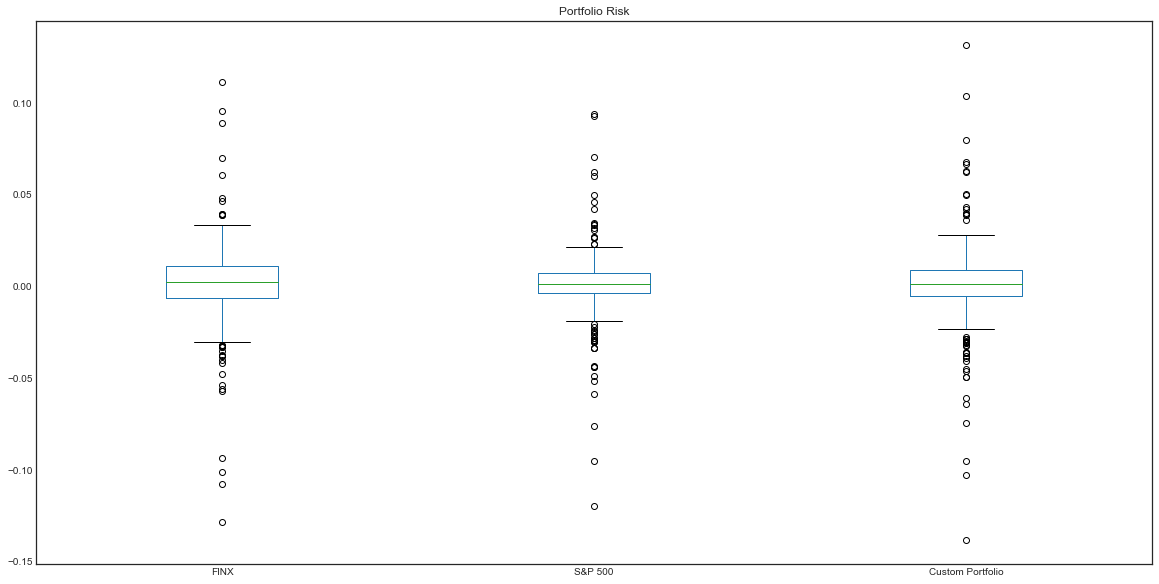

In [22]:
# Box plot to visually show risk
plt.style.use('seaborn-white') 
combined_daily_returns.plot.box(title = "Portfolio Risk", figsize = [20, 10])

In [23]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?

combined_std = combined_daily_returns.std()
combined_std

Symbol
FINX                0.021597
S&P 500             0.017911
Custom Portfolio    0.021840
dtype: float64

In [24]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
riskierthan_sp500 = combined_std.gt(combined_std['S&P 500'])
riskierthan_sp500

Symbol
FINX                 True
S&P 500             False
Custom Portfolio     True
dtype: bool

In [25]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
combined_annualized_std = combined_std * np.sqrt(252)
combined_annualized_std

Symbol
FINX                0.342841
S&P 500             0.284328
Custom Portfolio    0.346700
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

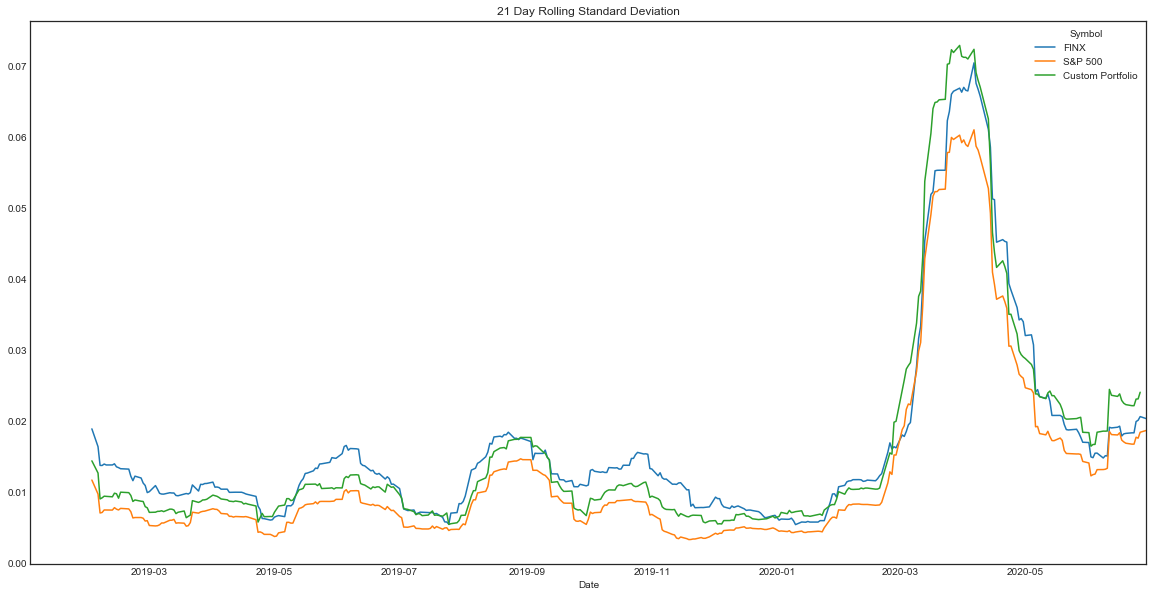

In [26]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window

combined_std_21 = combined_daily_returns.rolling(window=21).std()
plt.style.use('seaborn-white')
combined_std_21.plot(title = "21 Day Rolling Standard Deviation", figsize = [20, 10])

### Does the risk increase for each of the portfolios at the same time risk increases in the S&P?

**Based on risk measured by standard deviation, one can say that for most portfolios, risk increased in line with the increase in risk of the S&P 500 except for Tiger Global and Berkshire Hathaway which were much more riskier than the market.**

In [27]:
# Construct a correlation table
correlation = combined_daily_returns.corr()
correlation.style.background_gradient(cmap='summer')

Symbol,FINX,S&P 500,Custom Portfolio
Symbol,,,
FINX,1,0.918041,0.884647
S&P 500,0.918041,1,0.975846
Custom Portfolio,0.884647,0.975846,1


Custom Cov: 0.0003819263152318604 | S&P 500 Var: 0.00032080225864068235 | Custom Beta: 1.1905349945171073


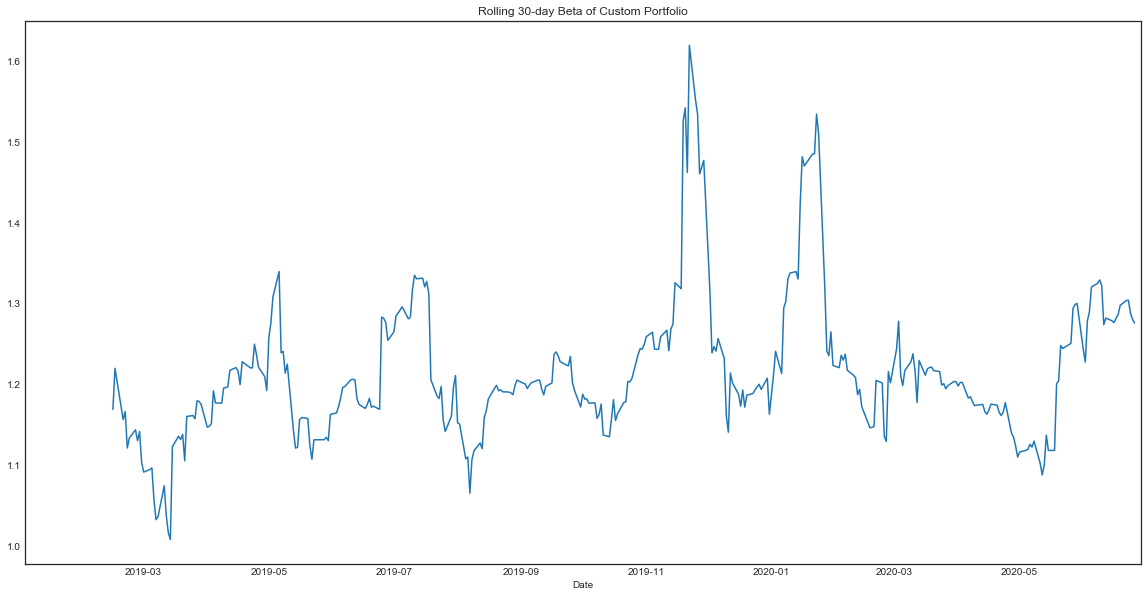

In [28]:
# Beta comparison for Custom portfolio compared to the total market (S&P 500)
custom_cov = combined_daily_returns['Custom Portfolio'].cov(combined_daily_returns['S&P 500'])
variance = combined_daily_returns['S&P 500'].var()
custom_beta = custom_cov / variance
print(f"Custom Cov: {custom_cov} | S&P 500 Var: {variance} | Custom Beta: {custom_beta}")

rolling_custom_cov = combined_daily_returns['Custom Portfolio'].rolling(window=30).cov(combined_daily_returns['S&P 500'])
rolling_variance = combined_daily_returns['S&P 500'].rolling(window=30).var()
rolling_custom_beta = rolling_custom_cov / rolling_variance
plt.style.use('seaborn-white')
rolling_custom_beta.plot(title = "Rolling 30-day Beta of Custom Portfolio", figsize = [20, 10])


FINX Cov: 0.00035511895148906736 | S&P 500 Var: 0.00032080225864068235 | FINX Beta: 1.1905349945171073


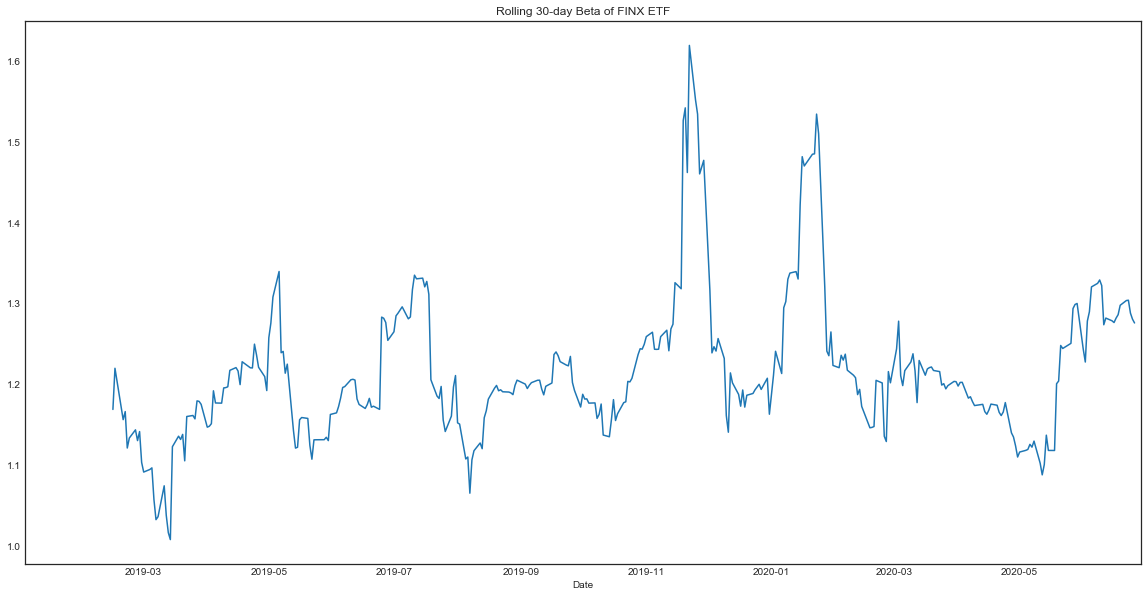

In [29]:
# Beta comparison for FINX ETF compared to the total market (S&P 500)
finx_cov = combined_daily_returns['FINX'].cov(combined_daily_returns['S&P 500'])
variance = combined_daily_returns['S&P 500'].var()
finx_beta = custom_cov / variance
print(f"FINX Cov: {finx_cov} | S&P 500 Var: {variance} | FINX Beta: {finx_beta}")

rolling_finx_cov = combined_daily_returns['FINX'].rolling(window=30).cov(combined_daily_returns['S&P 500'])
rolling_variance = combined_daily_returns['S&P 500'].rolling(window=30).var()
rolling_finx_beta = rolling_custom_cov / rolling_variance
plt.style.use('seaborn-white')
rolling_finx_beta.plot(title = "Rolling 30-day Beta of FINX ETF", figsize = [20, 10])


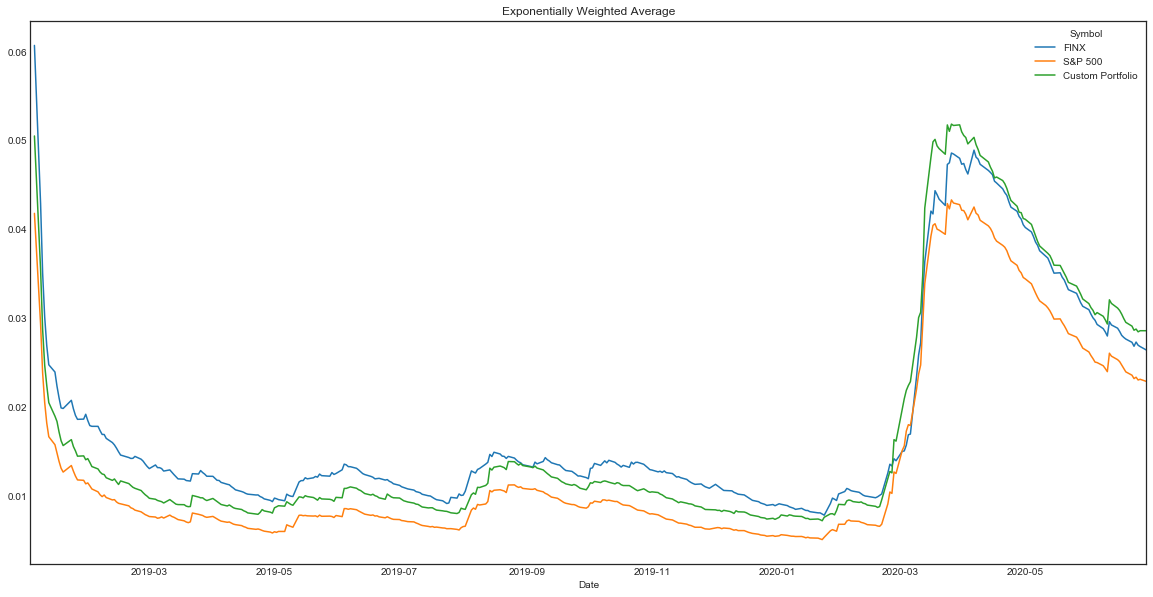

In [30]:
# Calculate a rolling window using the exponentially weighted moving average. 
ewm_combined = combined_daily_returns.ewm(halflife=21).std()
plt.style.use('seaborn-white')
ewm_combined.plot(title = "Exponentially Weighted Average", figsize = [20, 10])

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [31]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (combined_daily_returns.mean() * 252) / (combined_daily_returns.std() * np.sqrt(252))
sharpe_ratios

Symbol
FINX                0.933097
S&P 500             0.606238
Custom Portfolio    0.589040
dtype: float64

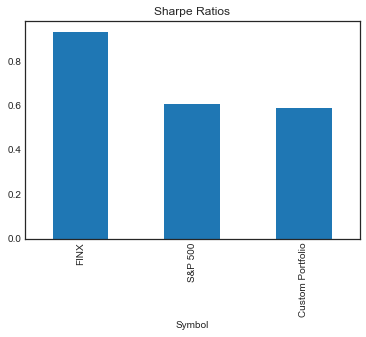

In [32]:
# Visualize the sharpe ratios as a bar plot
plt.style.use('seaborn-white')
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

The higher a fund's Sharpe ratio, the better its returns have been relative to the amount of investment risk it has taken

FINX has the highest sharpe Ratios and custom portfolio has the lowest sharpe ratios

---